Numpy 是python语言的一个扩展程序库。支持大量的维度数组与矩阵运算，也针对数组运算提供大量的数学函数库。
Numpy是一个运行速度非常快的数学库，主要用于数组计算，包含：
- 一个强大的N维数组对象ndarray
- 广播功能函数
- 线性代数、傅立叶变换、随机数生成等功能

Matplotlib可能是python 2D绘图领域使用最广泛的套件。它能让使用者很轻松地将数据图形化，并且提供多样化的输出格式。
IPython是Python的增加版本。它有如下方面增强：
- 命名输入输出
- 使用系统命令
- 排错能力

在命令行终端给IPython加上参数`-pylab`之后，就可以像matlab或者Mathematica那样以交互式的方式绘图。
pylab是matplotlib面向对象绘图库的一个接口。它的语法和matlab十分接近。

matplotlib: https://alv1.apachecn.org/#/docs/da/081

以下为示例：

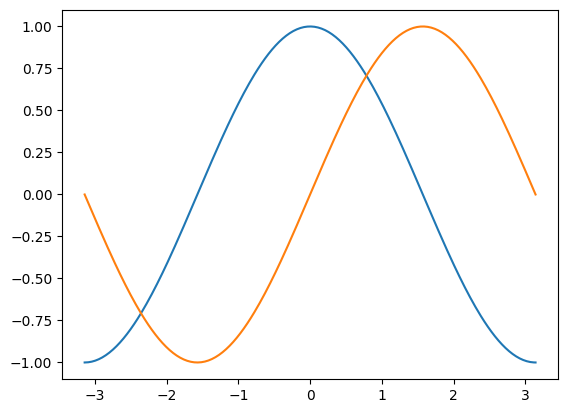

In [2]:
import numpy as np;
import matplotlib.pyplot as plt;

X = np.linspace(-np.pi, np.pi, 256, endpoint=True);
C,S = np.cos(X), np.sin(X)

plt.plot(X,C)
plt.plot(X,S)

为了更好地了解与学习Numpy，最好先知道怎么将数据画出来，这样会更直观一点。因此，先熟悉matplotlib吧。

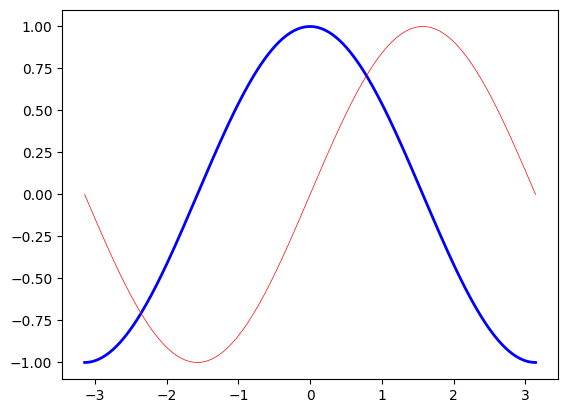

In [13]:
# 修改曲线属性
plt.plot(X,C,color="blue", linewidth=2, linestyle="-");
plt.plot(X,S,color="red", linewidth=0.5, linestyle="-");

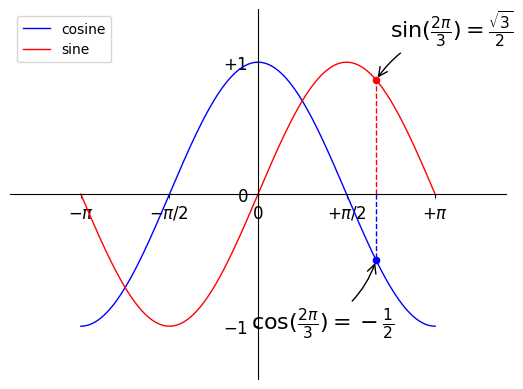

In [42]:
xmin, xmax = X.min(), X.max()
ymin, ymax = C.min(), C.max()

dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2

# X ，Y 轴约束
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)

# 标签
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])

# 移动脊柱
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# 添加图例
plt.plot(X, C, color="blue", linewidth=1, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=1, linestyle="-", label="sine")

plt.legend(loc='upper left')

# 给一些特殊点做注释
# 2pi/3的位置给两条函数曲线加上一个注释。首先在对应点的函数图像上画一个点，然后向横轴引一条垂线

# 1. 取特殊点
t = 2*np.pi/3

# 2.1 曲线上取点
plt.scatter([t,],[np.cos(t),], 20, color ='blue')

# 2.2 引垂线
plt.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=1, linestyle="--")

# 2.3 加注释
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
         xy=(t, np.sin(t)), xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t],[0,np.sin(t)], color ='red', linewidth=1, linestyle="--")
plt.scatter([t,],[np.sin(t),], 20, color ='red')

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
         xy=(t, np.cos(t)), xycoords='data',
         xytext=(-90, -50), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# 优化坐标轴上的记号标签被曲线挡住的问题，给标签加一个白色半透明背景

for label in ax.get_xticklabels() + ax.get_yticklabels():
    # 加大字号
    label.set_fontsize(12)
    # 增加背景
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

其他图例。

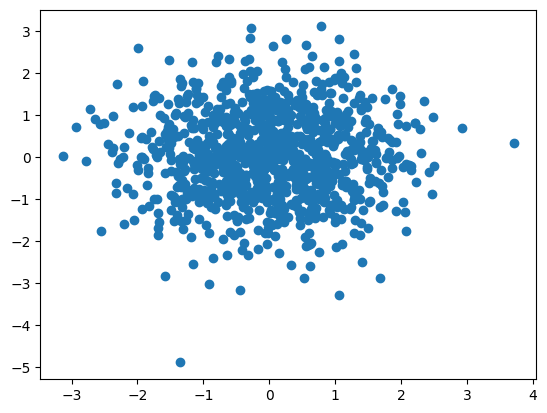

In [45]:
# 散点图
from pylab import *

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

scatter(X,Y)
show()


柱状图

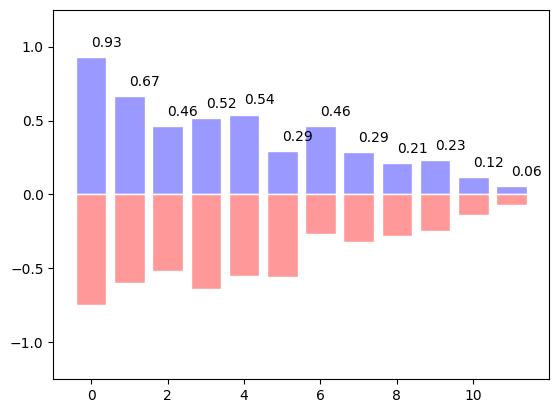

In [46]:
from pylab import *

n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)

bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x,y in zip(X,Y1):
    text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

ylim(-1.25,+1.25)
show()

等高线

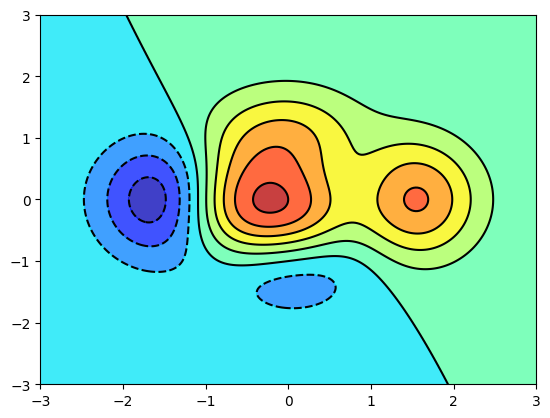

In [49]:
from pylab import *

def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

contourf(X, Y, f(X,Y), 8, alpha=.75, cmap='jet')
C = contour(X, Y, f(X,Y), 8, colors='black')
show()

灰度图

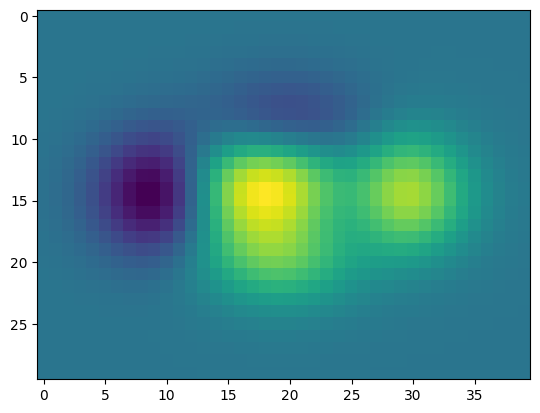

(<matplotlib.image.AxesImage at 0x230e136f3d0>, None)

In [50]:
from pylab import *

def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 10
x = np.linspace(-3,3,4*n)
y = np.linspace(-3,3,3*n)
X,Y = np.meshgrid(x,y)
imshow(f(X,Y)), show()

饼状图

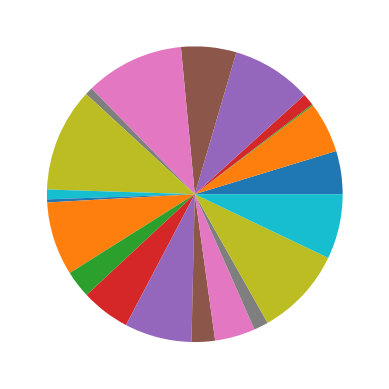

(([<matplotlib.patches.Wedge at 0x230e1409a10>,
  [Text(1.0879120159861764, 0.1626267059031013, ''),
   Text(0.9804034232001956, 0.4988077062128636, ''),
   Text(0.8763116182093896, 0.6648894252364382, ''),
   Text(0.8450372266067633, 0.7042102567051619, ''),
   Text(0.5843440789096188, 0.9319560061737192, ''),
   Text(0.10485003014293691, 1.0949915393184668, ''),
   Text(-0.46240548387766295, 0.9980887578165905, ''),
   Text(-0.789040132757378, 0.7664304723184089, ''),
   Text(-1.0181849474640194, 0.41629246060635344, ''),
   Text(-1.099998653426777, -0.0017211796180226654, ''),
   Text(-1.098859366488528, -0.050080861418621274, ''),
   Text(-1.0478375568098794, -0.3347184705669871, ''),
   Text(-0.8715874182800527, -0.6710703184435389, ''),
   Text(-0.6678881635068556, -0.8740282610118736, ''),
   Text(-0.2757962886784281, -1.0648645017800178, ''),
   Text(0.06361177767008087, -1.0981591604779575, ''),
   Text(0.3007967290568384, -1.0580743488945883, ''),
   Text(0.4934578060220932, 

In [51]:
from pylab import *

n = 20
Z = np.random.uniform(0,1,n)
pie(Z), show()

量场图

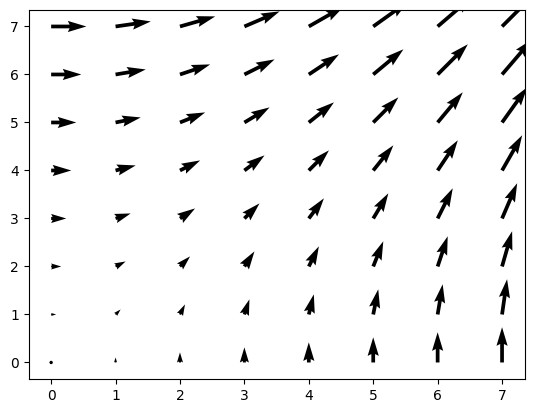

(<matplotlib.quiver.Quiver at 0x230e124f090>, None)

In [52]:
from pylab import *

n = 8
X,Y = np.mgrid[0:n,0:n]
quiver(X,Y), show()

网格

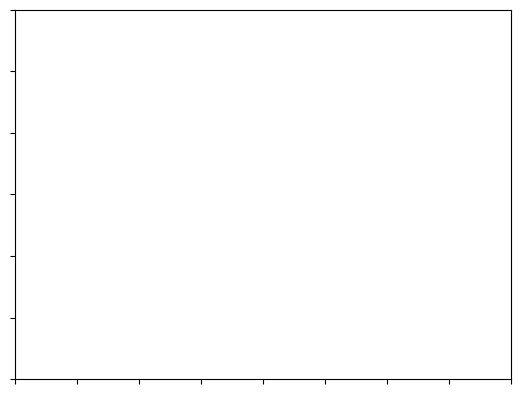

In [53]:
from pylab import *

axes = gca()
axes.set_xlim(0,4)
axes.set_ylim(0,3)
axes.set_xticklabels([])
axes.set_yticklabels([])

show()

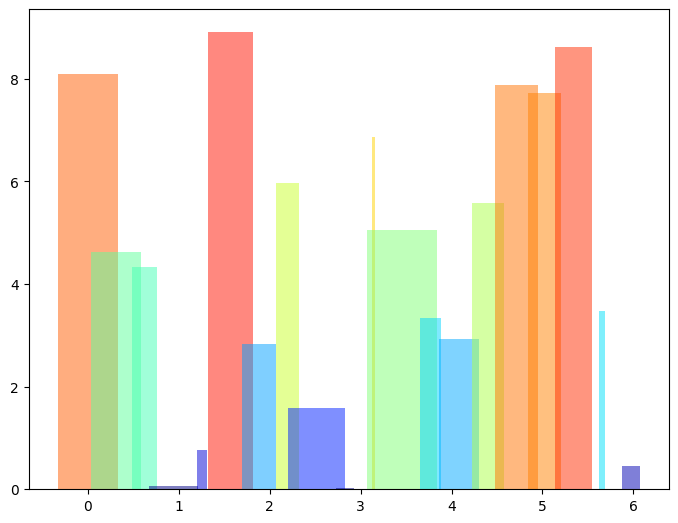

In [54]:
# 轴极图
from pylab import *

axes([0,0,1,1])

N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor( cm.jet(r/10.))
    bar.set_alpha(0.5)

show()

In [56]:
# 3D图
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

show()

<Figure size 640x480 with 0 Axes>

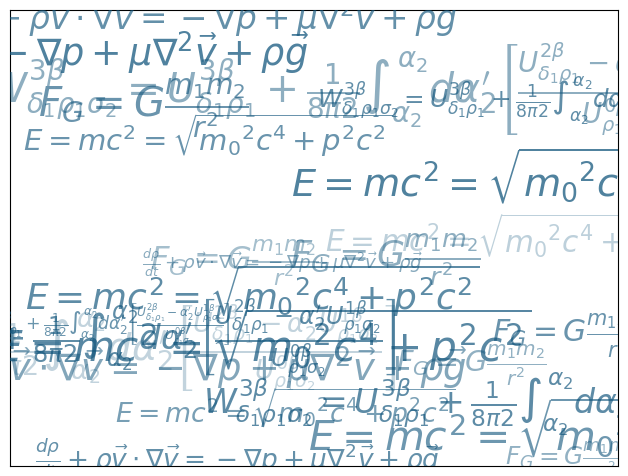

In [57]:
# 手搞图
import numpy as np
import matplotlib.pyplot as plt

eqs = []
eqs.append((r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$"))
eqs.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} = -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$"))
eqs.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$"))
eqs.append((r"$E = mc^2 = \sqrt{{m_0}^2c^4 + p^2c^2}$"))
eqs.append((r"$F_G = G\frac{m_1m_2}{r^2}$"))


plt.axes([0.025,0.025,0.95,0.95])

for i in range(24):
    index = np.random.randint(0,len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12,32)
    x,y = np.random.uniform(0,1,2)
    alpha = np.random.uniform(0.25,.75)
    plt.text(x, y, eq, ha='center', va='center', color="#11557c", alpha=alpha,
             transform=plt.gca().transAxes, fontsize=size, clip_on=True)

plt.xticks([]), plt.yticks([])
# savefig('../figures/text_ex.png',dpi=48)
plt.show()

参考：
1 https://www.runoob.com/w3cnote/matplotlib-tutorial.html
2 https://matplotlib.org/2.0.2/users/pyplot_tutorial.html

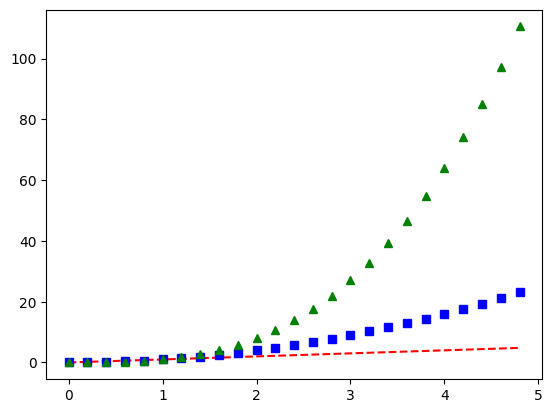

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# lines = plt.plot([1,2,3])
# plt.setp(lines)


<StemContainer object of 3 artists>

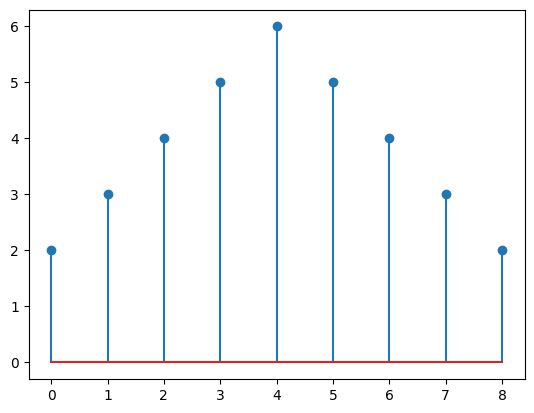

In [68]:
import numpy as np
import matplotlib.pyplot as plt

x = [0,1,2,3,4,5,6,7,8]
y = [2,3,4,5,6,5,4,3,2]

# plt.plot(x,y,"o--")
plt.stem(x,y)